**PROBLEM STATEMENT**
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

**Aim - Model how demand is affected by various variables**

In [246]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#regression model directories
import statsmodels
import statsmodels.api as sm
import sklearn

# specfic classes from libraries for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [247]:
# Read Data
df=pd.read_csv('C:\\Users\\User\\Documents\\UpGRAD-ML\\3.Linear Regression\\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [248]:
# Check number of rows and columns in data
df.shape


(730, 16)

In [249]:
# check information on data for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [250]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**ANALYSIS OF VARIABLES**

instant is the index, so not reqd
dteday beng catered for in terms of month and year so can be removed

**variable to be considered**
cnt

**Categorical Variables**
'season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit'

**Numerical Variables**
'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'

In [251]:
df.pop('instant') # removed 'instant'
df.pop('dteday')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


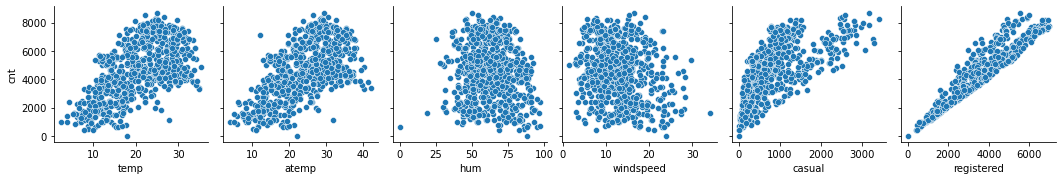

In [252]:
#visualise the data to appreciate linearity with numerical variables
sns.pairplot(data=df, x_vars=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], y_vars='cnt')

The Variable cnt is linearly dependant on all the variables.  The number of users seems to affect the demand most and so does the temp.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

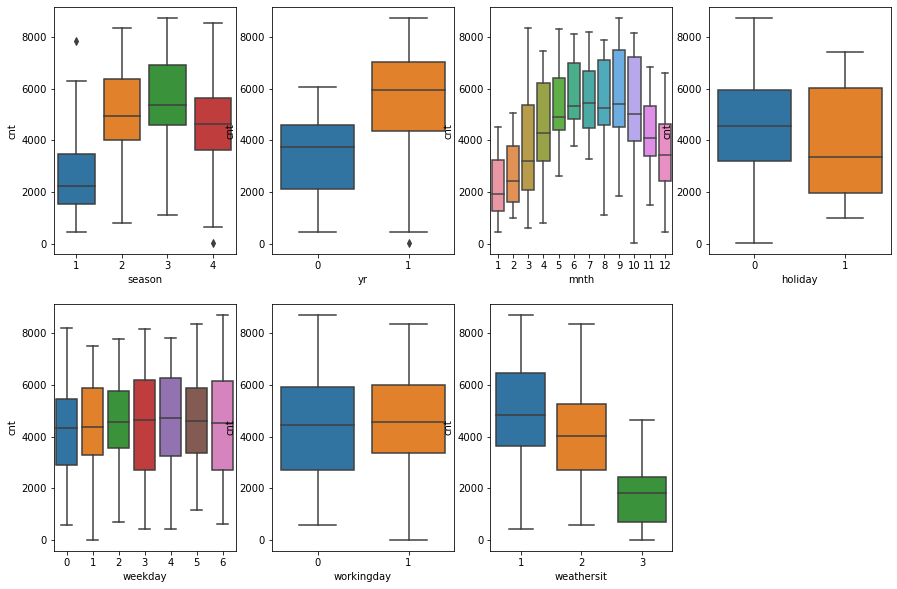

In [253]:
#Visualising the Categorical Variables - 'season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit'
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit', y='cnt', data=df)

The demand does seem to have relation to most of the categorical variables. However it seems weekdays and working days donot make a major impact, but holidays have some impact on the demand.

**ENCODING OF CATEGORICAL VARIABLES**

The categorical variables - 'season', 'yr', 'mnth', 'holiday','weekday', 'workingday', 'weathersit' are already encoded and can be used as such

In [254]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'day_of_week'

#day_of_week = pd.get_dummies(df['weekday'])

# Check what the dataset 'status' looks like
#day_of_week.head()

**TEST TRAIN SPLIT AND RE-SCALING**

In [255]:
#train-test split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 14)
(220, 14)


In [256]:
#ApplMin MAx Sclaer to all num variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981,0.053337,0.214554,0.191095


**Heat Map**

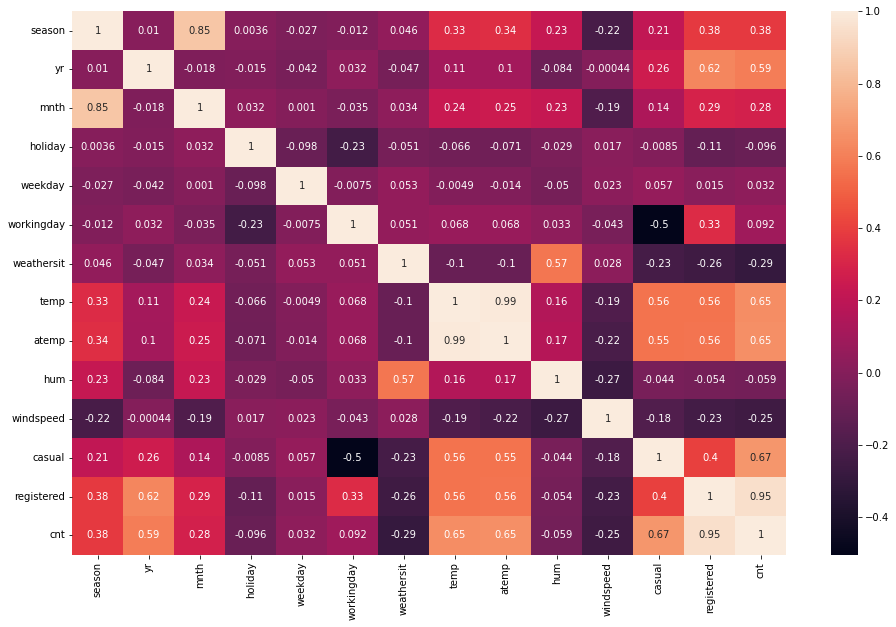

In [257]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [258]:
y_train = df_train.pop('cnt')
X_train = df_train

**Model Fitting using Recursive Feature Elimination**

In [259]:
#RFE for all 13 Variables
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1)]

as can be seen, RFE support is true for all variables

In [260]:
var = X_train.columns[rfe.support_]
# X_train dataframe for RFE selected variables
X_train_rfe = X_train[var]
# Adding a constant variable to X_train 
X_train_rfe = sm.add_constant(X_train_rfe)

# Applying the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.666e+30
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:35:43   Log-Likelihood:                 17056.
No. Observations:                 510   AIC:                        -3.408e+04
Df Residuals:                     496   BIC:                        -3.403e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.194e-16   2.33e-16      3.954      0.0

In [261]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,atemp,51.44
0,const,51.26
8,temp,50.62
13,registered,6.44
1,season,4.27
3,mnth,3.78
12,casual,3.77
6,workingday,3.41
2,yr,2.81
7,weathersit,1.88


**Determinig the Variables to Drop**

The variables temp and atemp were obviously interdependant and thus had a highcorrelation of 0.99 as per the heat map. Thus temp or atemp could be dropped as it showed both, a high p-value and a high VIF. The decision was to drop temp and the felt temp was considered a more important aspect

The variables holiday, workingday, humidity, windspeed had high p values and low VIFs


The variables 'temp', 'workingday' and 'windspeed' were dropped oneby one. The R2 value remained at 1 but the signficance of the coeff was observed.

In [270]:
# Determiig the var to drop
# we may have high p-value and high VIF - 'temp', 
# or Hgh p LOw VIF (remove these first) - 'workingday' , 'holiday' or Low p High VIF (afterwards)
# or low P low VIF
X_train_new = X_train_rfe.drop(["temp",'workingday', 'weekday', 'season', 'windspeed', 'holiday', 'mnth', 'hum', 'casual', 'yr'], axis = 1)
X_train_new.head()

,const,weathersit,atemp,registered
576,1.0,1,0.766351,0.899220
426,1.0,2,0.438975,0.446145
728,1.0,1,0.200348,0.203869
482,1.0,2,0.391735,0.444701
111,1.0,2,0.318819,0.214554


When only 'temp' was dropped the p value for workingday and holiday was 1.00 and .74 resp.

When 'temp' and 'workingday' were dropped, the p-values for holiday was .011. The p-value for weekday was .103

The weekday was then dropped as it did not show much demand variation as per initial plot. The mnth p value rose to .547.The month and season being interrelated, the mnth variable was dropped.

Holiday was dropped and pvalue for mnth increased to .373

Mnth was dropped and humidity was at .733.Humidity was dropped and all variables became significant with p value at 0

The model was still overfttingand therefore the registered variable was dropped. The R sq dropped to .65

The registered var was reincluded and the casual variable was removed. The p-value for year increased to .433

The variable 'yr' was also dropped. The r sq value reached .92 andadj r sq was also .92
The variables weathersit, atemp and registered were found to be most significant

when all three were dropped the p values for all balance variables were less than .002 and VIF were less than 3.3

In [263]:
#refit the model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1971.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          1.24e-278
Time:                        01:35:51   Log-Likelihood:                 686.73
No. Observations:                 510   AIC:                            -1365.
Df Residuals:                     506   BIC:                            -1349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0208      0.012      1.732      0.0

In [264]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.34
3,registered,1.56
2,atemp,1.47
1,weathersit,1.07


<AxesSubplot:ylabel='Density'>

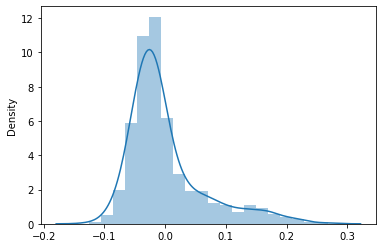

In [265]:
# Plot the histogram of the error terms
y_train_cnt = lm.predict(X_train_lm)
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)

**Testing the Model**

In [266]:
#Scale the test data same as train data
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('cnt')
X_test = df_test
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
184,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086
535,2,1,6,0,3,1,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976
299,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376
221,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,0.339570,0.268820,0.559630
152,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,0.537414,0.223712,0.608143


In [273]:
X_test = sm.add_constant(X_test)# Adding a constant variable 
# the test dayaframe should have the same variables as that have been considerd and not all
X_test_new = X_test[X_train_new.columns]
X_test_new.head()


,const,weathersit,atemp,registered
184,1.0,2,0.769660,0.427086
535,1.0,1,0.842587,0.767976
299,1.0,2,0.496145,0.346376
221,1.0,1,0.795343,0.559630
152,1.0,1,0.741471,0.608143


Text(0, 0.5, 'y_pred')

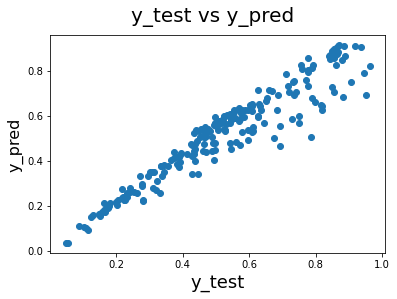

In [275]:
y_pred = lm.predict(X_test_new)
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [276]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9042247344682948